## Model Creation and Training

In [11]:
import pandas as pd

In [12]:
# Loading the data
data = pd.read_csv("datasets/feature_selected_data.csv", index_col=0)

In [13]:
print(data.shape)
data.head()

(26953, 49)


,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,ldl_url,ldl_path,urlLen,...,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,Entropy_Domain,Entropy_DirectoryName,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,0,0,58,...,1.000000,-1.0,8,3,2,1,0,0.784493,0.894886,0
1,0,4,5,5.5,14,6.000000,4,0,0,66,...,0.022008,-1.0,8,3,3,0,0,0.784493,0.814725,0
2,0,4,5,5.5,14,5.800000,4,0,0,65,...,0.022008,-1.0,8,3,3,0,0,0.784493,0.814725,0
3,0,4,12,5.5,14,5.500000,4,0,0,109,...,0.022008,-1.0,8,3,3,0,0,0.784493,0.814725,0
4,0,4,6,5.5,14,7.333334,4,0,0,81,...,0.022008,-1.0,8,3,3,0,0,0.784493,0.814725,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
# Splitting the dataset to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [7]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (21562, 48) (21562,)
Test data shape: (5391, 48) (5391,)


In [8]:
classifier = RandomForestClassifier(n_estimators=20, random_state=42)

In [9]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

## Model Evaluation

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Loading the encoder file
with open("label_encoder.pkl", "rb") as file:
    encoder = pickle.load(file)

In [ ]:
# Getting the model's predictions on the test set
pred = classifier.predict(X_test)

In [40]:
print(classification_report(y_test, pred, target_names=encoder.classes_))
print("\nModel Accuracy: {:.4f}".format(accuracy_score(y_test, classifier.predict(X_test))))

              precision    recall  f1-score   support

  Defacement       0.97      0.97      0.97      1006
      benign       0.97      0.99      0.98      1514
     malware       0.96      0.84      0.90       340
    phishing       0.94      0.95      0.95      1488
        spam       0.98      0.97      0.98      1043

    accuracy                           0.96      5391
   macro avg       0.96      0.94      0.95      5391
weighted avg       0.96      0.96      0.96      5391


Model Accuracy: 0.9620


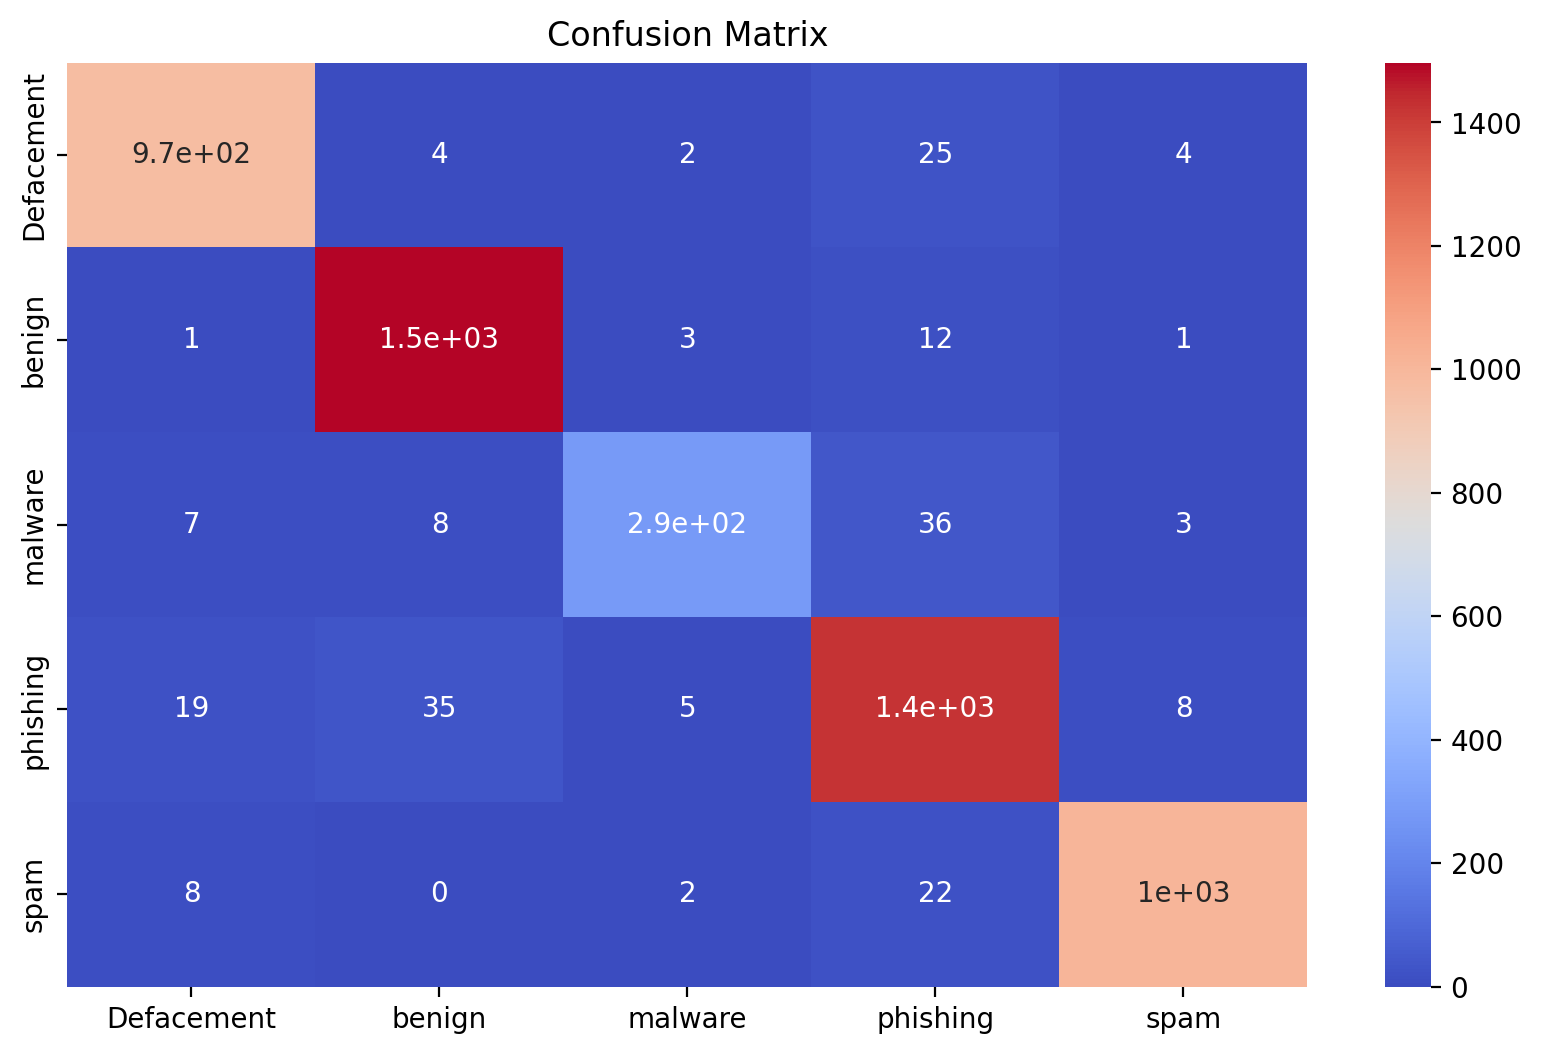

In [39]:
# Getting the confusion matrix for the model's performance
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(
    confusion_matrix(y_test, pred),
    annot=True,
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_,
    cmap="coolwarm"
)
plt.title("Confusion Matrix")
plt.savefig("./plots/final_classifier_confusion_matrix")
plt.show()

In [41]:
# Saving the model
with open("random_forest_classifier_model.pkl", "wb") as file:
    pickle.dump(classifier, file)

In [3]:
import numpy as np
from feature_extractor import FeatureExtractor

In [4]:
fe = FeatureExtractor()

In [27]:
features_dict = fe.extract_features("http://github.net/ghgkh/DejusDevsapce")

In [28]:
feature_names = list(features_dict.keys())

In [29]:
feature_vector = np.array([features_dict[name] for name in feature_names])

In [30]:
feature_vector = feature_vector.reshape(1, -1)

In [31]:
X

array([[ 0.        ,  4.        ,  5.        , ...,  0.        ,
         0.78449333,  0.89488552],
       [ 0.        ,  4.        ,  5.        , ...,  0.        ,
         0.78449333,  0.81472488],
       [ 0.        ,  4.        ,  5.        , ...,  0.        ,
         0.78449333,  0.81472488],
       ...,
       [29.        ,  4.        , 14.        , ...,  2.        ,
         0.79126523,  0.77749776],
       [58.        ,  3.        , 27.        , ...,  7.        ,
         0.80113879,  0.68477728],
       [40.        ,  3.        , 25.        , ...,  6.        ,
         0.80113879,  0.69728233]])

In [32]:
feature_vector.shape

(1, 48)

In [33]:
X.shape

(26953, 48)

In [34]:
import pickle

with open("random_forest_classifier_model.pkl", "rb") as file:
    model = pickle.load(file)

In [35]:
model.predict(feature_vector)

array([3])

In [36]:
model.predict_proba(feature_vector)

array([[0.25, 0.2 , 0.15, 0.35, 0.05]])

In [37]:
data.URL_Type_obf_Type.value_counts()

URL_Type_obf_Type
1    7464
3    7359
4    5331
0    5068
2    1731
Name: count, dtype: int64

In [38]:
print(fe.url_features)

{'Querylength': 0, 'domain_token_count': 1, 'path_token_count': 2, 'avgdomaintokenlen': np.float64(6.0), 'longdomaintokenlen': 6, 'avgpathtokenlen': np.float64(9.0), 'tld': 3, 'ldl_url': 37, 'ldl_path': 20, 'urlLen': 37, 'domainlength': 6, 'pathLength': 20, 'subDirLen': 6, 'pathurlRatio': 0.5405405405405406, 'ArgUrlRatio': 0.0, 'argDomanRatio': 0.0, 'domainUrlRatio': 0.16216216216216217, 'pathDomainRatio': 3.3333333333333335, 'argPathRatio': 0.0, 'NumberofDotsinURL': 1, 'CharacterContinuityRate': 0.05405405405405406, 'LongestVariableValue': 0, 'URL_DigitCount': 0, 'Directory_DigitCount': 0, 'Extension_DigitCount': 0, 'URL_Letter_Count': 31, 'host_letter_count': 9, 'Directory_LetterCount': 5, 'Filename_LetterCount': 13, 'Extension_LetterCount': 0, 'Query_LetterCount': 0, 'LongestPathTokenLength': 13, 'Domain_LongestWordLength': 6, 'Arguments_LongestWordLength': 0, 'URLQueries_variable': 0, 'spcharUrl': 2, 'delimeter_path': 2, 'NumberRate_URL': 0.0, 'NumberRate_FileName': 0.0, 'NumberRat